# Лабораторная работа №5

## по курсу "Численные методы"

## Попов Матвей, М8О-408Б-20
## Вариант 1


In [29]:
import math

x_begin = 0
x_end = math.pi

t_begin = 0
t_end = 5

h = 0.01
sigma = 1

a = 1

Запустим программу для вычислений

In [30]:
!go run cmd/main.go

Считаем результаты вычислений

In [31]:
import json

def read_json_file(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
        return data
    
solutions = read_json_file('results.json')

Определим функции для вычисления ошибки

In [32]:
import numpy as np

def max_abs_error(A, B):
    A = np.array(A)
    B = np.array(B)
    return abs(A - B).max()

def mean_abs_error(A, B):
    A = np.array(A)
    B = np.array(B)
    return abs(A - B).mean()


### Визуализация

Полученные вычисления на момент времени 0.5

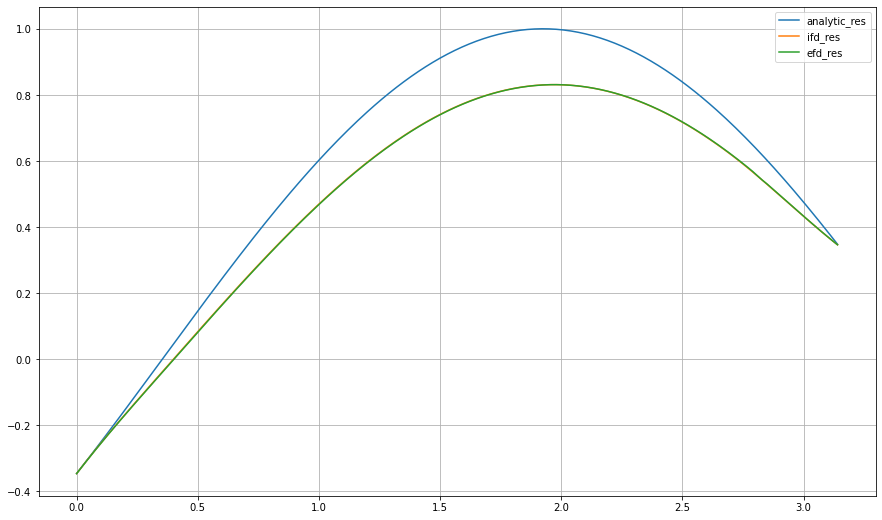

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(
    solutions,
    time,
    x_range,
    t_range,
    h,
    sigma,
    a,
):
    tau = np.sqrt(sigma * h**2)
    x = np.arange(*x_range, h)
    times = np.arange(*t_range, tau)
    cur_t_id = abs(times - time).argmin()

    plt.figure(figsize=(15, 9))
    for method_name, solution in solutions.items():
        plt.plot(x, solution[cur_t_id], label=method_name)

    plt.legend()
    plt.grid()
    plt.show()

plot_results(
    solutions,
    0.5,
    (x_begin, x_end),
    (t_begin, t_end),
    h,
    sigma,
    a
)


Изменение погрешности

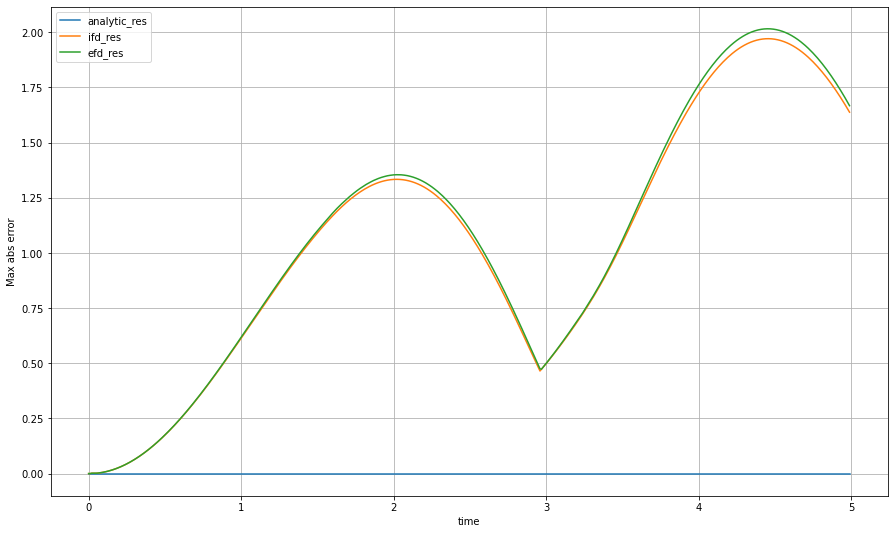

In [34]:
def plot_errors_from_time(
    solutions,
    t_range,
    h,
    sigma,
    a,
):
    tau = np.sqrt(sigma * h**2)
    t = np.arange(*t_range, tau)

    plt.figure(figsize=(15, 9))
    for method_name, solution in solutions.items():
        max_abs_errors = np.array([
            max_abs_error(solution[i], solutions['analytic_res'][i])
            for i in range(len(t))
        ])
        plt.plot(t, max_abs_errors, label=method_name)

    plt.xlabel('time')
    plt.ylabel('Max abs error')

    plt.legend()
    plt.grid()
    plt.show()

plot_errors_from_time(
    solutions,
    (t_begin, t_end),
    h,
    sigma,
    a,
)
